# Einführung in Natural Language Processing

Im folgenden werden anhand von Beispielen mithilfe der Software Libraries:
- spacy - eine Toolsammlung um Probleme im Bereich NLP mithilfe von vortrainierten Deeplearning zu lösen
- nltk - eher akademische Sammlung von Tools im Bereich NLP
- TextBlob - abstraktion für einige spezifische deutsche Corpora (z.B. ready to use sentiment analysis…)

einige elementare Methoden im Bereich NLP vorgestellt.

In [1]:
import random

from IPython.display import HTML

import nltk
import spacy
from spacy import displacy
from textblob_de import TextBlobDE as TextBlob

#load spacy de corpora
nlp = spacy.load("de")

Dieses Notebook dient als Ergänzung zu den Slides:

In [2]:
HTML('<iframe src="//lilith.slides.com/lilith/deck-31/embed?token=ivKQJ292" width="576" height="420" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>')

## Preprocessing

Für die meisten Tasks werden wir spacy benutzen, da es einerseits das aus meiner Sicht "industry-grade" tool für NLP und außerdem sehr einfach zu bedienen ist. In Spacy können wir das komplette lingustische preprocessing eines Satzes mit einem einzelnen Kommando erledigen:

In [3]:
nlp("Wie wird das Wetter morgen?")

Wie wird das Wetter morgen?

Mit ```nlp("<text>")``` durchläuft der Satz eine ganze Pipeline an funktionen und gibt den komplett annotierten Text als ein document zurück. Die Pipelines sehen dabei für jede Sprache etwas anders aus beinhalten grundsätzlich allerdings immer folgende Koponenten:
- Tokenizer
- POS-Tagging
- Dependency Parsing
- NER-Tagging

Die Pipeline für Deutsch sieht so aus:

In [4]:
nlp.pipeline

[('tagger', <spacy.pipeline.Tagger at 0x7fe53ee7c400>),
 ('parser', <spacy.pipeline.DependencyParser at 0x7fe53e968938>),
 ('ner', <spacy.pipeline.EntityRecognizer at 0x7fe53e968990>)]

![Pipeline](https://spacy.io/assets/img/pipeline.svg)
Im Folgenden werden wir uns mit den einzelnen Funktionen innerhalb dieser Pipeline beschäftigen.

### Tokenizing

Um Text sinnvoll weiterverarbeiten zu können, müssen wir ihn erst in seine einzelnen Bestandteile zerlegen. Das können einelne Wörter, Satzteile oder Sätze (Sentence Boundary Detection) sein.

In [5]:
nltk.tokenize.WordPunctTokenizer().tokenize("Wie wird das Wetter morgen in Hamburg?")

['Wie', 'wird', 'das', 'Wetter', 'morgen', 'in', 'Hamburg', '?']

In [6]:
[token.text for token in nlp("Wie wird das Wetter morgen in Hamburg?")]
    

['Wie', 'wird', 'das', 'Wetter', 'morgen', 'in', 'Hamburg', '?']

Augenscheinlich machen sowohl der NLTK als auch der spacy tokenizer hier genau das selbe. Allerdings funktioniert der NLTK Tokenizer im Hintergrund quasi mit einem Regex, während spacy dafür erst den Satz selbst nach Spaces separiert und dann mit einzelnen Regeln je nach Sprache auch auf Edge-Cases wie Fremdwörter im Deutschen, die mit Bindestrich geschrieben werden, rücksicht nimmt. 

![caption](https://spacy.io/assets/img/tokenization.svg)

Auch wenn das jetzt für Sprachen mit Lateinischen Alphabet erstmal relativ einfach aussieht, gibt es einige Sprachen (Chinesisch, Thailändisch, …) in denen das eine deutlich schwierigere Aufgabe ist.

In [7]:
nltk.tokenize.WordPunctTokenizer().tokenize("Davon hatte Dr. Müller kein Back-up gemacht!")

['Davon',
 'hatte',
 'Dr',
 '.',
 'Müller',
 'kein',
 'Back',
 '-',
 'up',
 'gemacht',
 '!']

In [8]:
[token.text for token in nlp("Davon hatte Dr. Müller kein Back-up gemacht!")]


['Davon', 'hatte', 'Dr.', 'Müller', 'kein', 'Back-up', 'gemacht', '!']

Einen guten Tokenizer braucht man normalerweise nicht nur bei fast allen Anwendungsfällen im Bereich Natural Language Processing, sondern auch vielen weiteren Bereichen wie z.B. Suchsystemen. Außerdem sollte man bedenken, das fehler in diesem Bereich problematisch für alle weiteren Arbeitsschritte sein können.

Beliebte weitere Fallstricke:
- Abkürzungen wie Dr., Fr., … sollten als ein Token gesehen werden und nicht zu einer Satztrennung führen
- Zahlen, Telefonnummern, feststehende Begriffe, … (je nach Level auf dem man tokenized vgl. High-Level-Tokenization)
- Abkürzungen wie I'm, You're, …

(https://www.ibm.com/developerworks/community/blogs/nlp/entry/tokenization?lang=en)

### Part of Speech tagging (POS)

Beim POS tagging geht es darum einen Satz in seine grammatikalischen Satzteile zu zerlegen. Es gibt dabei wieder unterschiedliche herangehensweisen wie das mithilfe von Software passieren kann. Spacy verwendet dabei statistische Verfahren (Markov Models). So ist die wahrscheinlichkeit relativ hoch das nach einem "dem" ein Substantiv im Dativ folgt. Diese Wahrscheinlichkeitskalkulationen passieren jetzt über mehrere Wörter hinweg, was dann zu einem relativ guten Ergebnis führt.

In [9]:
doc = nlp('Der Arzt hilft dem Patienten.')
spacy_rendering = {"words": [], "arcs": []}
for token in doc:
    spacy_rendering["words"].append({"text": token.text, "tag": token.tag_})
HTML(displacy.render(spacy_rendering, style='dep', manual=True, options={"compact": True}))

Für POS tagging alleine gibt es nicht so viele Usecases, allerdings ist es die Grundlage für Dependency Parsing und Named Entity Recognition.

### Depedency Parsing
Beim dependency parsing geht es darum, herauszufinden welches Wort sich wie auf welches andere Wort bezieht und hilft so auch dabei Haupt- und Nebensätze zu separieren um die Kernaussage eines Satzes herauszufinden.

In [10]:
doc = nlp('Der Arzt hilft dem Patienten.')
HTML(displacy.render(doc, style='dep'))

### Named Entity Recognition (NER)


Beim NER geht es darum Informationen (insb. feststehende Begriffe) aus Texten zu extrahieren und zu klassifizieren. Dies passiert heute im Normalfall auf basis der annotierten Daten (POS; depedency tree) und 

In [11]:
doc = nlp('Wie wird das Wetter morgen in Hamburg?')
HTML(displacy.render(doc, style='ent'))


Statistische Methoden für NER ermöglichen uns auch für nicht im Trainingsset vorhandenen Namen/… Tags mit einer reltiv hohen Genauigkeit zu vergeben.

In [12]:
doc = nlp('Wer ist Alan Turing?')
HTML(displacy.render(doc, style='ent'))


In [13]:
doc = nlp('Wer ist Lilith Wittmann?')
HTML(displacy.render(doc, style='ent'))


### Stemmer
Ein Stemmer ist ein Tool, welches versucht anhand von einfachen Regeln ein Wort auf seinen Wortstamm zu kürzen (z.B. um festzustellen ob ein Wort eine Konjugation eines anderen ist). Das funktioniert im Englischen auch relativ gut, allerdings haben wir im Deutschen Probleme wie starke Verben die das ganze so ziemlich nutzlos machen.

In [14]:
stemmer = nltk.stem.snowball.GermanStemmer()
# Dinge wie Umlaute in pluralformen sind regelbasiert noch machbar
stemmer.stem("Menschen") + " " + stemmer.stem("Kinder") + " " + stemmer.stem("Bäder")



'mensch kind bad'

In [15]:
stemmer.stem("essen") + " " + stemmer.stem("aß") + " " + stemmer.stem("gegessen")

'ess ass gegess'

### Lemmatizer
Ein Lemmatizer arbeitet im Gegensatz (zumindest in der Trainingsphase) mit einem echten Wörterbuch und kann so den lexikalischen Wortstamm herausfinden. Das ermöglicht dann später auch funktionen wie das verändern der Konjugation eines Verbs beim Umstellen eines Satzes.

In [16]:
[token.lemma_ for token in nlp("Wie wird das Wetter morgen in Hamburg?")] # funktioniert bei spacy noch nicht so perfekt

['Wie', 'werden', 'der', 'wettern', 'morgen', 'in', 'Hamburg', '?']

In [17]:
[token.lemma_ for token in nlp("Lilith aß gestern Hummus.")]

['Lilith', 'essen', 'gestern', 'Hummus', '.']

In [18]:
[token.lemma_ for token in nlp("essen - aß - gegessen")] 

['essen', '-', 'essen', '-', 'essen']

### Stopwords
Zumeist die häufigsten Wörter einer Sprache oder spezifischen Domäne, die in einem Text beim Weiterverarbeiten ignoriert werden sollen. Werden z.B. bei suchsystemen benutzt um nicht jedem Text, die einen Artikel der im Suchquery stand enthält, zu finden.

Kann bei feststehenden Begriffen und Eigenenamen z.B. "die Welle" problematisch werden. Da empfiehlt sich dann Elemente die von einem NER erkannt wurden nicht als Stopwords zu markieren.

In [19]:
["{} - {}".format(token.text, token.is_stop) for token in nlp("Wie wird das Wetter morgen in Hamburg?")] 

['Wie - False',
 'wird - True',
 'das - True',
 'Wetter - False',
 'morgen - True',
 'in - True',
 'Hamburg - False',
 '? - False']

### Preprocessing Pipeline erweitern
Es kann vorkommen, das man eigene Funktionen in einer bestehenden preprocessing Pipeline durchführen möchte. z.B. seinen eigenen NER Tagger benutzen oder Daten auf eine Bestimmte Art bereinigen. Auch das ist mit Spacy relativ einfach möglich.

In diesem Fall wollen wir die Wortvectoren von einzelnen Wörtern zusammenfügen um einen kompletten Satz in seiner Vectorform erhalten zu können.

In [20]:
import numpy as np
def calculate_document_vectors(document):
    """calculates the vectors for the input sentence and adds it to the document"""
    vectors = []
    for token in document:
        if token.vector.all() != None:
            vectors.append(token.vector)
    if len(vectors) > 0:
        sum_vectors = np.sum(vectors, axis=0) / len(vectors)
    else:
        sum_vectors = np.zeros(spacy.vocab.vectors_length)
    
    # intialize extension variable
    doc.set_extension('vector', default=True)
    
    document._.vector = sum_vectors
    return document

# add calculate_document_vectors as a pipeline step
nlp.add_pipe(calculate_document_vectors, name='calculate_document_vectors', last=True)
print(nlp.pipe_names) 


['tagger', 'parser', 'ner', 'calculate_document_vectors']


In [21]:
doc = nlp("Wie wird das Wetter morgen in Hamburg?")
print(doc._.vector)

[-9.60005283e-01 -1.42031324e+00 -1.39692652e+00  1.54604244e+00
  5.10063469e-01  2.53958797e+00 -7.85469413e-01 -1.67401409e+00
  4.75193679e-01  1.52145612e+00  1.31106055e+00 -8.10774684e-01
 -2.86875105e+00  1.91085148e+00  1.41275108e+00  2.52005005e+00
 -6.02132738e-01 -8.42801630e-01  2.14502287e+00 -1.35398519e+00
  6.15745842e-01 -7.12715834e-02 -7.52448320e-01  5.48410416e-02
 -1.91989970e+00  2.39742613e+00  3.35050249e+00 -4.06068563e-01
  4.55959082e-01  1.89419657e-01 -1.08924103e+00 -1.30628419e+00
 -1.89369351e-01 -1.57305360e+00  2.04342890e+00  1.83883011e+00
  4.97969836e-01  8.40657592e-01 -2.68162751e+00  1.74087620e+00
  2.09340155e-02 -2.97767115e+00  1.30148733e+00  1.49778759e+00
  1.05355740e+00  2.44767523e+00  2.92400861e+00  2.13427973e+00
 -1.04330087e+00  2.15468574e+00 -1.05976999e-01 -4.15641129e-01
 -1.32000005e+00 -2.37148643e-01 -1.66685748e+00 -7.34763265e-01
 -9.63998556e-01  1.15699506e+00  2.04573900e-01  1.46130383e+00
 -1.53127193e+00  2.83403

**Geocoding**
Außerdem wollen wir dierekt in der Pipeline alle als Orte erkannten Entities mit Geodaten Taggen um sie z.B. auf einer Karte darstellen zu können.

In [22]:
import requests
import time

def geocode_locations(document):
    for key, entity in enumerate(document.ents):
        if entity.label_ == "LOC":
            document.ents[key].set_extension('location', default=None)
            RESPONSE_STATUS_OK = 'OK'
            GEOCODE_API_URL = 'https://maps.googleapis.com/maps/api/geocode/json'
            params = {'sensor': 'false', 'language': "DE", 'address': entity.text}
            response = requests.get(GEOCODE_API_URL, params=params)
            geo_response = response.json()
            results = []
            # print(geo_response['status'] )
            if geo_response['status'] == RESPONSE_STATUS_OK:
                location = {'lat': float(geo_response['results'][0]['geometry']['location']['lat']),
                            'lon': float(geo_response['results'][0]['geometry']['location']['lng'])}
                document.ents[key]._.location = location
                time.sleep(2)#hack for google quota limits
            
    return document

# add calculate_document_vectors as a pipeline step
nlp.add_pipe(geocode_locations, name='geocode_locations', last=True)
print(nlp.pipe_names) 


['tagger', 'parser', 'ner', 'calculate_document_vectors', 'geocode_locations']


Extraktion der geo entity aus unserem Beispielsatz…

In [23]:
doc = nlp("wie wird das Wetter morgen in Hamburg?")
print(doc.ents[0]._.location)

{'lat': 53.5510846, 'lon': 9.9936819}


Mit jupyter können wir so außerdem super einfach die in texten vorkommende Orte auf einer Karte visualisieren.

In [24]:
from ipyleaflet import (
    Map,
    Marker, 
    TileLayer, 
    basemaps
)

center = [51.381716, 10.304767]
zoom = 5

m = Map(center=center, zoom=zoom)


doc = nlp("Mit der Völkerwanderung im 5. Jahrhundert verfielen die antiken Städte auf dem Gebiet des heutigen Deutschlands weitgehend. Nur zu Augsburg, Regensburg, Trier und Köln ist der durchgängige Bestand als Stadt gesichert. Die Anzahl der Städte in Mitteleuropa blieb bis ca. 1100 mit einigen Hundert noch sehr gering. Der weitaus größte Teil entstand in den folgenden 250 Jahren, als ab 1120 zahlreiche Gründungsstädte entstanden, meist durch einen Gründungsakt und Stadtentwurf. Etwa zum Beginn der Neuzeit, Anfang des 16. Jahrhunderts, bestanden als bedeutende Städte (neben weiteren heute v. a. niederländischen, französischen und belgischen) vorwiegend die Freien Reichsstädte und die Residenzstädte:")

for entity in doc.ents:
    if entity.label_ == "LOC":
        # print(entity.text)
        if hasattr(entity._, 'location') and entity._.location != None:
            #print([entity._.location["lat"], entity._.location["lon"]])
            m += Marker(location=[entity._.location["lat"], entity._.location["lon"]])

m

Map(basemap={'max_zoom': 19, 'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'attribution': 'Map …

In [25]:
HTML(displacy.render(doc, style='ent'))

## Training einer SVM zur intent classification
In vielen aktuellen QnA und chatbot Systemen versuchen wir anhand des vom User eingegebenen Satzes in Verbindung mit dem Gesprächskontext den intent hinter einer Aussage herauszufinden. 

Zum training haben wir soeben eine Funktion in spacy erweitert, um word vectoren auf Satzebene zu berechnen. Nehmen wir an, wir möchten eine SVM mit folgenden 3 Klassen trainieren:
- greeting
- frage nach dem wetter
- sonstige nicht zuordnenbare aussagen

Dafür haben nun jeweils 10 trainingssätze (was natürlich für einen echten usecases viel zu wenig ist, aber zu demozwecken ausreichend).

In [26]:
training_data = {
    
    "greeting": [
        "hi",
        "Hey",
        "Hallo",
        "Guten Tag",
        "Guten Morgen",
        "Guten Abend",
        "Grüßgott",
        "Na du",
        "Ahoi",
        "Glück auf"
    ],
    "weather": [
        "Wie wird das Wetter heute?",
        "Was sagt das Wetter",
        "Wird es morgen in Hamburg regnen?",
        "Wird es sonnig in Hamburg?",
        "Ich will wissen ob morgen die sonne scheint?",
        "Wird es morgen kalt?",
        "Wie warm wird es morgen?",
        "Wird es morgen in Berlin warm?",
        "Wie warm wird es heute abend?"
        "Wird es Freitag schneien?"
    ],
    "out_of_scope": [
        "der atem meiner katze riecht nach Katzenfutter",
        "Heute ist das Techcamp",
        "In Hamburg sind die Mietpreise hoch", 
        "Heute abend gibts Pizza",
        "Amazon alexa ist langweilig",
        "f3oirf0",
        "Sinnlos, Teuer einfach dumm - Vorratsdatenspeicherung",
        "Langsam fallen mir keine sätze mehr ein",
        "Warum muss ich soviel schreiben?",
        "Ob das wirklich mir 10 sätzen funktioniert, wage ich zu bezweifeln"
    ],
    
    "mood": [
        "Mir geht es sehr gut",
        "Ich fühle mich schlecht",
        "Ich bin sehr traurig",
        "Ganz OK",
        "Mir ist langweilig",
        "Ich weiß auch nicht, glaube ganz in Ordnung",
        "Ich bin glücklich",
        "Mir geht es sehr gut, weil ich heute einen Vortrag auf dem Techcamp halten darf",
        "Ich glaube mir geht es nicht so gut.",
        "Scheiße"
    ]

}

In [27]:
from typing import Iterable, Optional, Any, Dict, List

class TrainingData(object):
    def __init__(self):
        self._data = []

    def add_data(self, data: List[Dict[str, Any]]):
        """adds new training data to the dataset
            :param data: a`List` of training dicts with `text` and `intent` as keys
            :return: None
        """
        for itm in data:
            itm["preprocessed_sentences"] = nlp(itm["text"])
            self._data.append(itm)

    def get_data(self) -> List[Dict[str, Any]]:
        """get all sentences/intents as a list
            :return: a list of dictionarys with sentences/intents
        """
        return self._data

    def get_intents(self) -> List[str]:
        """get a list of all defined intents in the trainingset
            :return: a list of intents
        """
        return list(set([itm["intent"] for itm in self._data]))

    def get_training_data_by_intent(self, intent: str) -> List[str]:
        """get  a list of traing sentences for a given intend
            :param intent: name of the intent
            :return: a list of sentences
        """
        return [itm for itm in self._data if itm["intent"] == intent]


    def get_training_dataset(self) -> List[Dict[str, Any]]:
        """returns a list of intents and a list of preprocessed sentence in an order ready for training
            :returns: a tuple of two lists of strings (intent/sentence)
        """
        return [itm["intent"] for itm in self._data], [itm["preprocessed_sentences"] for itm in self._data]

    
"""
This file is originally taken from https://github.com/golastmile/rasa_nlu/blob/master/rasa_nlu/classifiers/sklearn_intent_classifier.py
and has been modified

Copyright 2016 LastMile Technologies Ltd

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this project except in compliance with the License. You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0
"""
import os
from typing import Iterable, Optional, Any, Dict, List

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

# How many intents are at max put into the output intent ranking, everything else will be cut off
INTENT_RANKING_LENGTH = 10


class SklearnIntentClassifier(object):
    """Intent classifier using the sklearn framework"""
    def __init__(self):
        self.data = {}
        self.data["label_encoder"] = LabelEncoder()
        self.data["clf"] = None
        self.stage_name = "sklearn_classifier"

    def transform_labels_str2num(self, labels: List[str]) -> List[int]:
        """Transforms a list of strings into numeric label representation.

        :param labels: List of labels to convert to numeric representation"""
        return self.data["label_encoder"].fit_transform(labels)

    def transform_labels_num2str(self, labels: List[int]) -> List[str]:
        """Transforms a list of strings into numeric label representation.

        :param labels: List of labels to convert to numeric representation"""

        return self.data["label_encoder"].inverse_transform(labels)

    def train(self, training_data: TrainingData, num_threads: int):
        # type: (TrainingData, [float], int) -> None
        """Train the intent classifier on a data set.

        :param num_threads: number of threads used during training time"""

        intents = training_data.get_intents()
        if len(intents) < 2:
            raise Exception("Can not train an intent classifier. Need at least 2 different classes.")
        label_list, preprocessed_data = training_data.get_training_dataset()

        labels = self.transform_labels_str2num(label_list)

        
        tuned_parameters = [{'C': [1, 2, 5, 10, 20, 100], 'kernel': ['linear']}]
        cv_splits = min(5, np.min(np.bincount(labels)))

        self.data["clf"] = GridSearchCV(SVC(C=1, probability=True),
                                param_grid=tuned_parameters, n_jobs=num_threads,
                                cv=cv_splits, scoring='f1_weighted')
        self.data["X"] = [itm._.vector for itm in preprocessed_data]
        self.data["y"] = labels
        self.data["clf"].fit(self.data["X"], self.data["y"])

    def process(self, intent_features: List[float]) -> dict:
        """Returns the most likely intent and its probability for the input text."""

        X = intent_features.reshape(1, -1)
        intent_ids, probabilities = self.predict(X)
        intents = self.transform_labels_num2str(intent_ids)
        # `predict` returns a matrix as it is supposed to work for multiple examples as well, hence we need to flatten
        intents, probabilities = intents.flatten(), probabilities.flatten()
        if intents.size > 0 and probabilities.size > 0:
            ranking = zip(list(intents), list(probabilities))
            return {
                "intent": {
                    "name": intents[0],
                    "confidence": probabilities[0],
                },
                "intent_ranking": [{"name": intent, "confidence": score} for intent, score in ranking]
            }
        else:
            return {"intent": None, "intent_ranking": []}

    def predict_prob(self, X: np.ndarray) -> np.ndarray:
        """Given a bow vector of an input text, predict the intent label. Returns probabilities for all labels.

        :param X: bow of input text
        :return: vector of probabilities containing one entry for each label"""

        return self.data["clf"].predict_proba(X)

    def predict(self, X: np.ndarray):
        """Given a bow vector of an input text, predict most probable label. Returns only the most likely label.

        :param X: bow of input text
        :return: tuple of first, the most probable label and second, its probability"""

        pred_result = self.predict_prob(X)
        # sort the probabilities retrieving the indices of the elements in sorted order
        sorted_indices = np.flip(np.argsort(pred_result, axis=1), axis=1)
        return sorted_indices, pred_result[:, sorted_indices]


In [28]:
clf = SklearnIntentClassifier()
data = TrainingData()
for intent in training_data:
    data.add_data([{"intent": intent, "text": example} for example in training_data[intent]])

clf.train(data, 2)

/home/lilith/.virtualenvs/eliza-py/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lilith/.virtualenvs/eliza-py/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lilith/.virtualenvs/eliza-py/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lilith/.virtualenvs/eliza-py/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted',

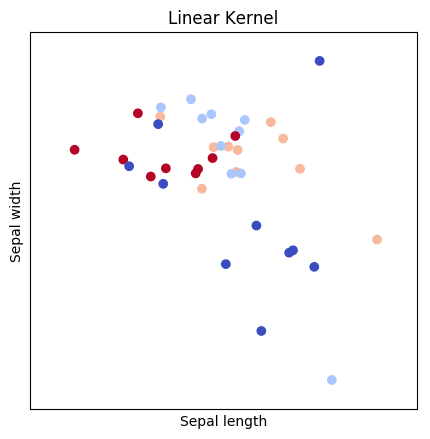

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
X = np.array(clf.data["X"])
plt.figure(figsize=(1200/100, 1200/100), dpi=100)
plt.subplot(2, 2, 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
#Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=clf.data["y"], cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title("Linear Kernel")

plt.show()

In [30]:
clf.process(nlp("Wie wird das wetter morgen?")._.vector)

/home/lilith/.virtualenvs/eliza-py/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


{'intent': {'confidence': 0.6666773939746583, 'name': 'weather'},
 'intent_ranking': [{'confidence': 0.6666773939746583, 'name': 'weather'},
  {'confidence': 0.24917112214931644, 'name': 'out_of_scope'},
  {'confidence': 0.05656438894344844, 'name': 'mood'},
  {'confidence': 0.02758709493257672, 'name': 'greeting'}]}

In [31]:
clf.process(nlp("Ich möchte in Hamburg pizza bestellen")._.vector)

/home/lilith/.virtualenvs/eliza-py/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


{'intent': {'confidence': 0.46145802099263183, 'name': 'out_of_scope'},
 'intent_ranking': [{'confidence': 0.46145802099263183,
   'name': 'out_of_scope'},
  {'confidence': 0.29607649378561174, 'name': 'weather'},
  {'confidence': 0.18565800119785317, 'name': 'mood'},
  {'confidence': 0.05680748402390334, 'name': 'greeting'}]}

In [32]:
clf.process(nlp("Ahoi")._.vector)

/home/lilith/.virtualenvs/eliza-py/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


{'intent': {'confidence': 0.7731218947687859, 'name': 'greeting'},
 'intent_ranking': [{'confidence': 0.7731218947687859, 'name': 'greeting'},
  {'confidence': 0.08895378071421907, 'name': 'out_of_scope'},
  {'confidence': 0.07755305709455852, 'name': 'mood'},
  {'confidence': 0.0603712674224365, 'name': 'weather'}]}

Erstaunlicherweise reichen für die 3 Klassen die 10 Sätze um ähnliche Fragen/Aussagen klassifizieren zu können schon halbwegs aus, jetzt brauchen wir nurnoch ein paar Funktionen um darauf antworten zu können und ein kleines mapping:

In [44]:
def greeting(doc):
    return "Hey!"

def out_of_scope(doc):
    return "Ich glaube dabei kann ich dir nicht  helfen ;-/"

def weather(doc):
    results = []
    for entity in doc.ents:
        if entity.label_ == "LOC" and entity._.location != None:
            data = requests.get("http://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&APPID=7259b3d40a731868ec52abb3506f153e&units=metric"\
                .format(entity._.location["lat"], entity._.location["lon"])).json()
            results.append("Aktuell ist die Temperatur in {}  {}°C. Heute soll es {} und die Temperaturen liegen zwischen {}°C und {}°C"\
                .format(entity.text, data["main"]["temp"], data["weather"][0]["description"], data["main"]["temp_min"], data["main"]["temp_max"]))

    return ".\n".join(results)

def mood(doc):
    blob = TextBlob(doc.text)
    if blob.sentiment.polarity > 0.5:
        return "Cool das freut mich!"
    elif blob.sentiment.polarity < -0.5:
        return "Oh das tut mir leid!"
        
    return "Hmm. OK"

mapping = {
    "greeting": greeting,
    "weather": weather,
    "out_of_scope": out_of_scope,
    "mood": mood
}


In [45]:
def answer(question):
    q = nlp(question)
    intents = clf.process(q._.vector)
    return mapping[intents["intent"]["name"]](q)

answer("Ahoi")

/home/lilith/.virtualenvs/eliza-py/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'Hey!'

In [46]:
answer("Wie wird das Wetter morgen in Hamburg und Berlin")

/home/lilith/.virtualenvs/eliza-py/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'Aktuell ist die Temperatur in Hamburg  14.31°C. Heute soll es clear sky und die Temperaturen liegen zwischen 14°C und 15°C'

In [42]:
answer("Das techcamp ist super spannend!")

/home/lilith/.virtualenvs/eliza-py/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'Ich glaube dabei kann ich dir nicht  helfen ;-/'

In [47]:
answer("Mir geht es super schlecht.")

/home/lilith/.virtualenvs/eliza-py/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'Oh das tut mir leid!'

In [49]:
answer("Mir geht es gut!")

/home/lilith/.virtualenvs/eliza-py/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'Cool das freut mich!'

In [50]:
answer("Mir geht es ganz OK!")

/home/lilith/.virtualenvs/eliza-py/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'Hmm. OK'

# Bücher und andere Resourcen
- [**spacy Doku** ](https://spacy.io/usage/spacy-101)
- [nltk doku](https://www.nltk.org/)
- [Next Generation Natural Language Processing with Python - Alexis Rutherford](https://www.safaribooksonline.com/library/view/natural-language-processing/9781787285101/)
- [Natural Language Processing with Python Cookbook](https://www.safaribooksonline.com/library/view/natural-language-processing/9781787289321/)